In [1]:
import pandas as pd
from collections import Counter

# Load the dataset
file_path = "Dataset .csv"  # Change path if needed
df = pd.read_csv(file_path)

# Drop rows with missing 'Cuisines' values
df_cuisine = df.dropna(subset=['Cuisines'])

# Count individual cuisines
cuisine_counter = Counter()
for entry in df_cuisine['Cuisines']:
    cuisines = [c.strip() for c in entry.split(',')]
    cuisine_counter.update(cuisines)

# Total number of restaurants
total_restaurants = len(df_cuisine)

# Top 3 most common cuisines with percentage
top_3_cuisines = cuisine_counter.most_common(3)
top_3_with_percentage = [
    (cuisine, count, round((count / total_restaurants) * 100, 2))
    for cuisine, count in top_3_cuisines
]

# Display results
print("Top 3 Most Common Cuisines and Their Percentages:")
for cuisine, count, percent in top_3_with_percentage:
    print(f"{cuisine}: {count} restaurants ({percent}%)")


Top 3 Most Common Cuisines and Their Percentages:
North Indian: 3960 restaurants (41.5%)
Chinese: 2735 restaurants (28.66%)
Fast Food: 1986 restaurants (20.81%)


In [3]:
import pandas as pd

# Load the dataset
file_path = "Dataset .csv"  # Update if needed
df = pd.read_csv(file_path)

# 1. Identify the city with the highest number of restaurants
city_counts = df['City'].value_counts()
city_with_most_restaurants = city_counts.idxmax()
num_restaurants_in_top_city = city_counts.max()

# 2. Calculate the average rating for restaurants in each city
city_avg_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# 3. Identify the city with the highest average rating
top_rated_city = city_avg_ratings.idxmax()
top_avg_rating = city_avg_ratings.max()

# Display results
print("City with the highest number of restaurants:")
print(f"{city_with_most_restaurants}: {num_restaurants_in_top_city} restaurants\n")

print("City with the highest average restaurant rating:")
print(f"{top_rated_city}: Average Rating {round(top_avg_rating, 2)}")


City with the highest number of restaurants:
New Delhi: 5473 restaurants

City with the highest average restaurant rating:
Inner City: Average Rating 4.9


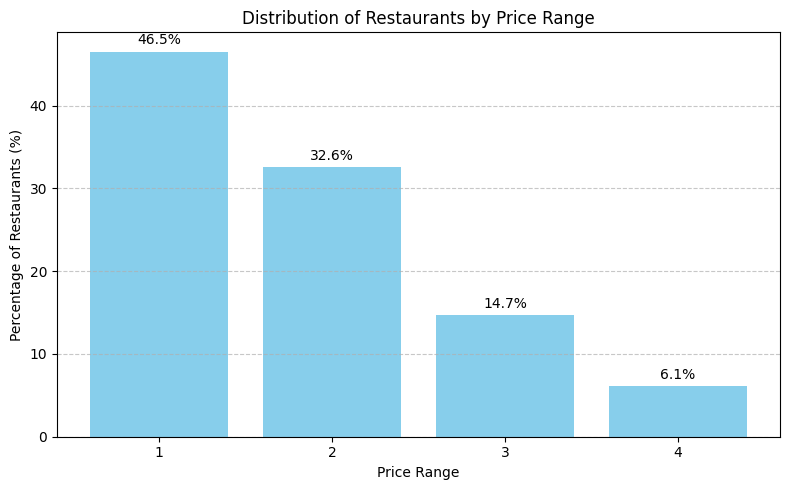

Percentage of restaurants in each price range:
Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Dataset .csv"  # Update this if needed
df = pd.read_csv(file_path)

# Count number of restaurants in each price range
price_range_counts = df['Price range'].value_counts().sort_index()

# Calculate percentage of restaurants in each price range
total_restaurants = len(df)
price_range_percentages = (price_range_counts / total_restaurants) * 100

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(price_range_counts.index.astype(str), price_range_percentages, color='skyblue')
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants (%)")
plt.title("Distribution of Restaurants by Price Range")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display percentages
print("Percentage of restaurants in each price range:")
print(price_range_percentages.round(2))


In [12]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\priya\Downloads\Dataset .csv"
df = pd.read_csv(file_path)

# Step 1: Clean the 'Has Online delivery' column (remove missing)
df_delivery = df.dropna(subset=['Has Online delivery', 'Aggregate rating']).copy()

# Normalize to lowercase for consistency (if needed)
df_delivery['Has Online delivery'] = df_delivery['Has Online delivery'].str.strip().str.lower()

# Step 2: Calculate percentage of restaurants offering online delivery
total = len(df_delivery)
online_yes = len(df_delivery[df_delivery['Has Online delivery'] == 'yes'])
online_delivery_percentage = round((online_yes / total) * 100, 2)

# Step 3: Compare average ratings
avg_rating_with_delivery = df_delivery[df_delivery['Has Online delivery'] == 'yes']['Aggregate rating'].mean()
avg_rating_without_delivery = df_delivery[df_delivery['Has Online delivery'] == 'no']['Aggregate rating'].mean()

# Output results
print(f"✅ Percentage of restaurants offering online delivery: {online_delivery_percentage}%\n")
print("📊 Average Ratings:")
print(f"With Online Delivery: {round(avg_rating_with_delivery, 2)}")
print(f"Without Online Delivery: {round(avg_rating_without_delivery, 2)}")


✅ Percentage of restaurants offering online delivery: 25.66%

📊 Average Ratings:
With Online Delivery: 3.25
Without Online Delivery: 2.47


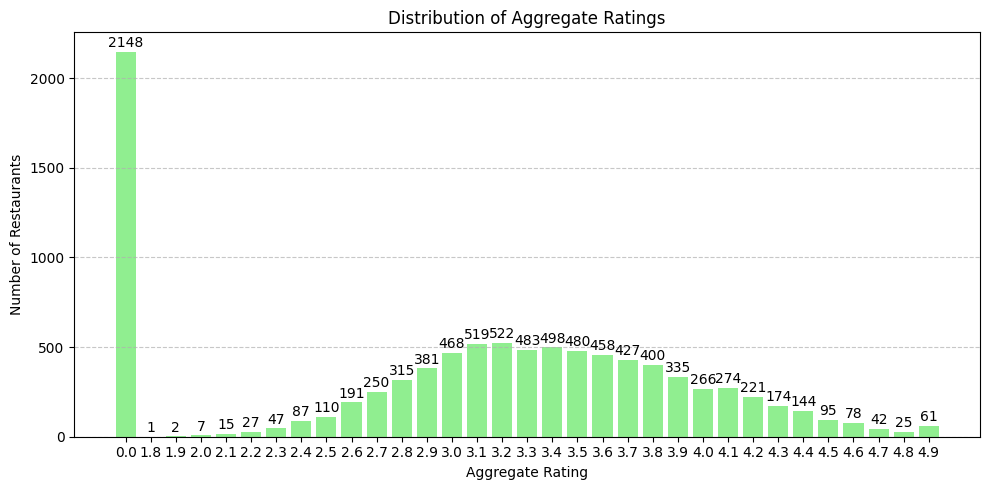

Most Common Rating: 0.0 (2148 restaurants)
Average Number of Votes: 156.91


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\priya\Downloads\Dataset .csv"  # Use raw string to avoid escape issues
df = pd.read_csv(file_path)

# 1. Analyze the distribution of aggregate ratings
rating_counts = df['Aggregate rating'].value_counts().sort_index()

# 2. Most common rating
most_common_rating = rating_counts.idxmax()
most_common_rating_count = rating_counts.max()

# 3. Average number of votes
average_votes = df['Votes'].mean()

# Plotting the rating distribution
plt.figure(figsize=(10, 5))
bars = plt.bar(rating_counts.index.astype(str), rating_counts.values, color='lightgreen')
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Aggregate Ratings")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display results
print(f"Most Common Rating: {most_common_rating} ({most_common_rating_count} restaurants)")
print(f"Average Number of Votes: {average_votes:.2f}")


In [7]:
import pandas as pd
from collections import Counter
import itertools

# Load the dataset
file_path = r"C:\Users\priya\Downloads\Dataset .csv"
df = pd.read_csv(file_path)

# Step 1: Drop missing values and make a safe copy
df_clean = df.dropna(subset=['Cuisines', 'Aggregate rating']).copy()

# Step 2: Break multi-cuisine strings into unique sorted cuisine pairs
pair_counter = Counter()
pair_ratings = {}

for _, row in df_clean.iterrows():
    cuisines = [c.strip() for c in row['Cuisines'].split(',')]
    rating = row['Aggregate rating']
    
    # Use only pairs if there are at least 2 cuisines
    if len(cuisines) >= 2:
        pairs = itertools.combinations(sorted(cuisines), 2)
        for pair in pairs:
            pair_counter[pair] += 1
            pair_ratings.setdefault(pair, []).append(rating)

# Step 3: Build results into a DataFrame
pair_data = []
for pair in pair_counter:
    count = pair_counter[pair]
    avg_rating = round(sum(pair_ratings[pair]) / len(pair_ratings[pair]), 2)
    pair_data.append({
        'Cuisine Pair': ' & '.join(pair),
        'Count': count,
        'Average Rating': avg_rating
    })

pair_df = pd.DataFrame(pair_data).sort_values(by='Count', ascending=False)

# Step 4: Show top 10 cuisine combinations
print("Top 10 Most Common Cuisine Pairs with Their Average Ratings:\n")
print(pair_df.head(10))


Top 10 Most Common Cuisine Pairs with Their Average Ratings:

                    Cuisine Pair  Count  Average Rating
379       Chinese & North Indian   1784            2.70
368       Mughlai & North Indian    832            2.76
421     Fast Food & North Indian    485            2.70
408   Continental & North Indian    468            3.41
439          Chinese & Fast Food    466            2.58
392  North Indian & South Indian    405            2.55
403            Chinese & Mughlai    379            2.70
391       Chinese & South Indian    346            2.48
279        Chinese & Continental    303            3.36
418       Italian & North Indian    295            3.53


In [35]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import webbrowser

# Step 1: Load the dataset
file_path = r"C:\Users\priya\Downloads\Dataset .csv"
df = pd.read_csv(file_path)

# Step 2: Drop rows without Latitude or Longitude
df_geo = df.dropna(subset=['Latitude', 'Longitude']).copy()
print("✅ Valid restaurant locations:", len(df_geo))

# Optional: Check if there's data to plot
if df_geo.empty:
    print("⚠️ No valid location data to plot.")
else:
    # Step 3: Create a base map (centered on India or average location)
    map_center = [df_geo['Latitude'].mean(), df_geo['Longitude'].mean()]
    map_obj = folium.Map(location=map_center, zoom_start=5)

    # Step 4: Add a cluster of markers
    marker_cluster = MarkerCluster().add_to(map_obj)

    for _, row in df_geo.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            tooltip=row['City']
        ).add_to(marker_cluster)

    # Step 5: Save and open map
    output_file = "restaurant_map.html"
    map_obj.save(output_file)
    print(f"✅ Map saved as '{output_file}'. Opening in your browser...")
    webbrowser.open(output_file)
    


✅ Valid restaurant locations: 9551
✅ Map saved as 'restaurant_map.html'. Opening in your browser...


🍽️ Top 10 Most Common Cuisines with Ratings and Popularity:

              Count  Average Rating  Total Votes
North Indian   3960            2.51       595981
Chinese        2735            2.62       363879
Fast Food      1986            2.56       184058
Mughlai         995            2.61       151944
Italian         764            3.56       329265
Bakery          745            2.44        57690
Continental     736            3.52       288255
Cafe            703            3.32       177568
Desserts        653            2.98       105889
South Indian    636            2.47        80962


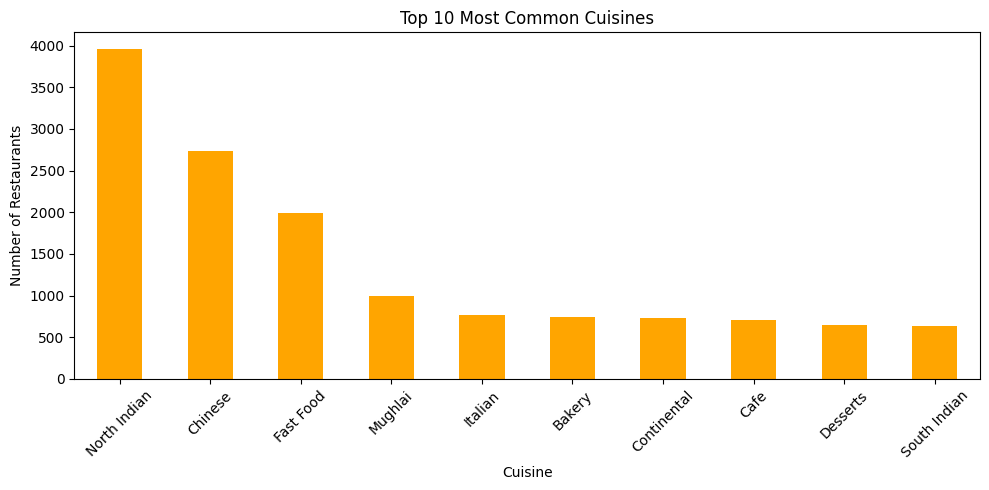

In [37]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Users\priya\Downloads\Dataset .csv"
df = pd.read_csv(file_path)

# Drop rows with missing cuisines or ratings
df = df.dropna(subset=['Cuisines', 'Aggregate rating', 'Votes'])

# Step 1: Clean and tokenize cuisine combinations
df['Cuisine List'] = df['Cuisines'].apply(lambda x: [c.strip() for c in str(x).split(',')])

# Step 2: Count cuisine frequencies
all_cuisines = [cuisine for sublist in df['Cuisine List'] for cuisine in sublist]
cuisine_counts = Counter(all_cuisines)

# Step 3: Average rating and total votes per cuisine
cuisine_stats = {}

for cuisine in cuisine_counts:
    mask = df['Cuisine List'].apply(lambda x: cuisine in x)
    subset = df[mask]
    avg_rating = subset['Aggregate rating'].mean()
    total_votes = subset['Votes'].astype(int).sum()
    cuisine_stats[cuisine] = {
        'Count': cuisine_counts[cuisine],
        'Average Rating': round(avg_rating, 2),
        'Total Votes': total_votes
    }

# Step 4: Convert to DataFrame for viewing
cuisine_df = pd.DataFrame.from_dict(cuisine_stats, orient='index')
cuisine_df = cuisine_df.sort_values(by='Count', ascending=False)

# Step 5: Show top 10 cuisines
print("🍽️ Top 10 Most Common Cuisines with Ratings and Popularity:\n")
print(cuisine_df.head(10))

# Step 6: Plot Top 10 Cuisines by Count
cuisine_df.head(10)['Count'].plot(kind='bar', color='orange', figsize=(10, 5), title='Top 10 Most Common Cuisines')
plt.ylabel("Number of Restaurants")
plt.xlabel("Cuisine")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🏆 Restaurants with the Highest Votes:
    Restaurant Name  Votes  Aggregate rating
728            Toit  10934               4.8

🪫 Restaurants with the Lowest Votes:
                 Restaurant Name  Votes  Aggregate rating
69              Cantinho da Gula      0               0.0
874                The Chaiwalas      0               0.0
879           Fusion Food Corner      0               0.0
880                Punjabi Rasoi      0               0.0
887                Baskin Robbin      0               0.0
...                          ...    ...               ...
9044               6 Packs Momos      0               0.0
9098                   Cafe' Wow      0               0.0
9099  Chef's Basket Pop Up Caf��      0               0.0
9103            The Hangout-Deli      0               0.0
9111                    Platters      0               0.0

[1094 rows x 3 columns]

📊 Correlation between Votes and Aggregate Rating: 0.31


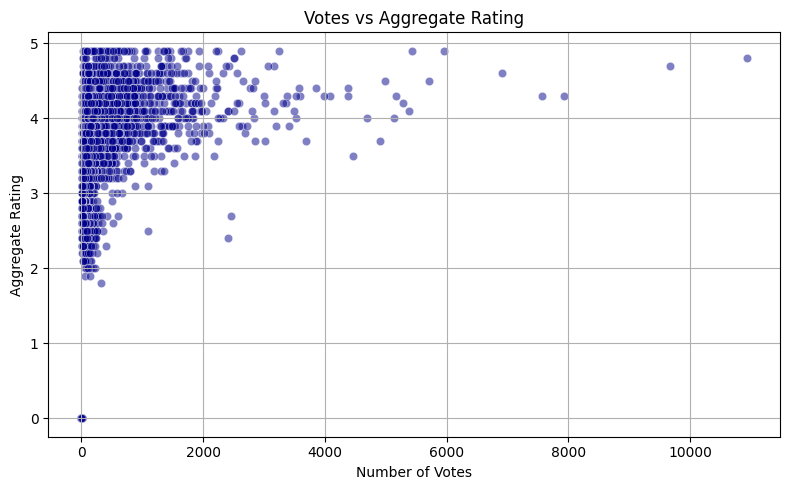

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\priya\Downloads\Dataset .csv"  # Use correct path if needed
df = pd.read_csv(file_path)

# Step 1: Clean and prepare the data
df_clean = df.dropna(subset=['Votes', 'Aggregate rating', 'Restaurant Name']).copy()
df_clean['Votes'] = pd.to_numeric(df_clean['Votes'], errors='coerce')

# Step 2: Find restaurants with highest and lowest number of votes
max_votes = df_clean['Votes'].max()
min_votes = df_clean['Votes'].min()

highest_voted = df_clean[df_clean['Votes'] == max_votes][['Restaurant Name', 'Votes', 'Aggregate rating']]
lowest_voted = df_clean[df_clean['Votes'] == min_votes][['Restaurant Name', 'Votes', 'Aggregate rating']]

print("🏆 Restaurants with the Highest Votes:")
print(highest_voted)

print("\n🪫 Restaurants with the Lowest Votes:")
print(lowest_voted)

# Step 3: Correlation between Votes and Rating
correlation = df_clean[['Votes', 'Aggregate rating']].corr().iloc[0, 1]
print(f"\n📊 Correlation between Votes and Aggregate Rating: {correlation:.2f}")

# Step 4: Plot relationship between Votes and Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df_clean, alpha=0.5, color='darkblue')
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Average availability by Price Range:
   Price range  Has Online delivery  Has Table booking
0            1             0.157741           0.000225
1            2             0.413106           0.076775
2            3             0.291903           0.457386
3            4             0.090444           0.467577


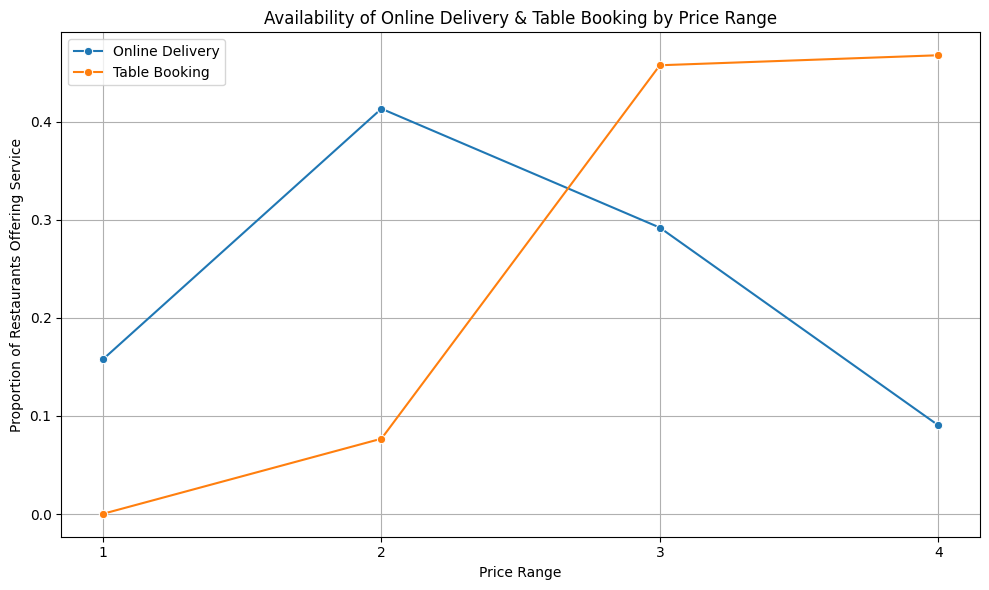

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = r"C:\Users\priya\Downloads\Dataset .csv"  # Update if needed
df = pd.read_csv(file_path)

# Step 1: Clean and prepare the relevant columns
df_clean = df[['Price range', 'Has Online delivery', 'Has Table booking']].dropna()

# Step 2: Convert 'Yes'/'No' to 1/0
df_clean['Has Online delivery'] = df_clean['Has Online delivery'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df_clean['Has Table booking'] = df_clean['Has Table booking'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

# Step 3: Group by price range and calculate average availability
grouped = df_clean.groupby('Price range')[['Has Online delivery', 'Has Table booking']].mean().reset_index()

# Step 4: Print the table
print("📊 Average availability by Price Range:")
print(grouped)

# Step 5: Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Price range', y='Has Online delivery', marker='o', label='Online Delivery')
sns.lineplot(data=grouped, x='Price range', y='Has Table booking', marker='o', label='Table Booking')

plt.title("Availability of Online Delivery & Table Booking by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Proportion of Restaurants Offering Service")
plt.xticks(grouped['Price range'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
